# Experiment 1 - General Accuracy and Robustness

In [4]:
import os

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import shapiro

# 01. Load the Data

In [5]:
# Set pandas display options to show all rows
pd.set_option('display.max_rows', None)

ROOT = '..'

PATH_40_SGBM = 'datasets/evaluation/offline/on_surface/4cm/experiment_1682327595'

PATH_80_SGBM = 'datasets/evaluation/offline/on_surface/8cm/experiment_1682328303'

PATH_120_SGBM = 'datasets/evaluation/offline/on_surface/12cm/experiment_1682328693'

PATH_40_RAFT = 'datasets/evaluation/offline/on_surface/4cm/experiment_1681817246'

PATH_80_RAFT = 'datasets/evaluation/offline/on_surface/8cm/experiment_1681892890'

PATH_120_RAFT = 'datasets/evaluation/offline/on_surface/12cm/experiment_1681892056'

df_40_sgbm_results = pd.read_csv(os.path.join(ROOT, PATH_40_SGBM, 'results.csv'))

df_80_sgbm_results = pd.read_csv(os.path.join(ROOT, PATH_80_SGBM, 'results.csv'))

df_120_sgbm_results = pd.read_csv(os.path.join(ROOT, PATH_120_SGBM, 'results.csv'))

df_40_raft_results = pd.read_csv(os.path.join(ROOT, PATH_40_RAFT, 'results.csv'))

df_80_raft_results = pd.read_csv(os.path.join(ROOT, PATH_80_RAFT, 'results.csv'))

df_120_raft_results = pd.read_csv(os.path.join(ROOT, PATH_120_RAFT, 'results.csv'))

dataframes = {'df_40_sgbm_results': df_40_sgbm_results,
              'df_80_sgbm_results': df_80_sgbm_results,
              'df_120_sgbm_results': df_120_sgbm_results,
              'df_40_raft_results': df_40_raft_results,
              'df_80_raft_results': df_80_raft_results,
              'df_120_raft_results': df_120_raft_results
              }

df_metrics = pd.DataFrame()

metrics_dict = {}

for key in dataframes:
    # Calculate absolute difference
    dataframes[key]['euclidian_diff'] = (dataframes[key]['euclidian'] - dataframes[key]['ground_truth']).abs()

    # Calculate absolute difference
    dataframes[key]['on_surface_diff'] = (dataframes[key]['on_surface'] - dataframes[key]['ground_truth']).abs()

    # Calculate absolute difference
    dataframes[key]['on_surface_spline_diff'] = (dataframes[key]['on_surface_spline'] - dataframes[key]['ground_truth']).abs()

    ae = dataframes[key]['euclidian_diff'].to_numpy()
    
    metrics = {'mae': float(ae.mean()),
               'min': float(ae.min()),
               'std': float(ae.std()),
               'p25': float(np.percentile(ae, 25)),
               'p50': float(np.percentile(ae, 50)),
               'p75': float(np.percentile(ae, 75)),
               'p95': float(np.percentile(ae, 95)),
               'p975': float(np.percentile(ae, 97.5)),
               'max': float(ae.max())}
    
    metrics_dict[key] = metrics
    
    df_metrics = pd.concat([df_metrics, pd.DataFrame([metrics], index=[key])])

    
print(df_metrics[['mae', 'std', 'min', 'p25', 'p50', 'p75', 'p95', 'p975', 'max']].round(2).to_latex())

\begin{tabular}{lrrrrrrrrr}
\toprule
 & mae & std & min & p25 & p50 & p75 & p95 & p975 & max \\
\midrule
df_40_sgbm_results & 732.970000 & 500.940000 & 0.240000 & 101.800000 & 983.090000 & 1180.890000 & 1270.850000 & 1337.040000 & 1362.220000 \\
df_80_sgbm_results & 615.340000 & 495.420000 & 0.000000 & 70.700000 & 535.530000 & 1147.590000 & 1209.820000 & 1226.370000 & 1241.640000 \\
df_120_sgbm_results & 618.960000 & 491.090000 & 0.360000 & 50.240000 & 683.390000 & 1139.410000 & 1205.760000 & 1230.420000 & 1311.190000 \\
df_40_raft_results & 0.180000 & 0.150000 & 0.000000 & 0.070000 & 0.160000 & 0.240000 & 0.480000 & 0.570000 & 0.670000 \\
df_80_raft_results & 0.280000 & 0.190000 & 0.070000 & 0.150000 & 0.220000 & 0.380000 & 0.730000 & 0.780000 & 0.790000 \\
df_120_raft_results & 0.240000 & 0.180000 & 0.010000 & 0.110000 & 0.210000 & 0.320000 & 0.600000 & 0.620000 & 0.670000 \\
\bottomrule
\end{tabular}



# 02. Metrics

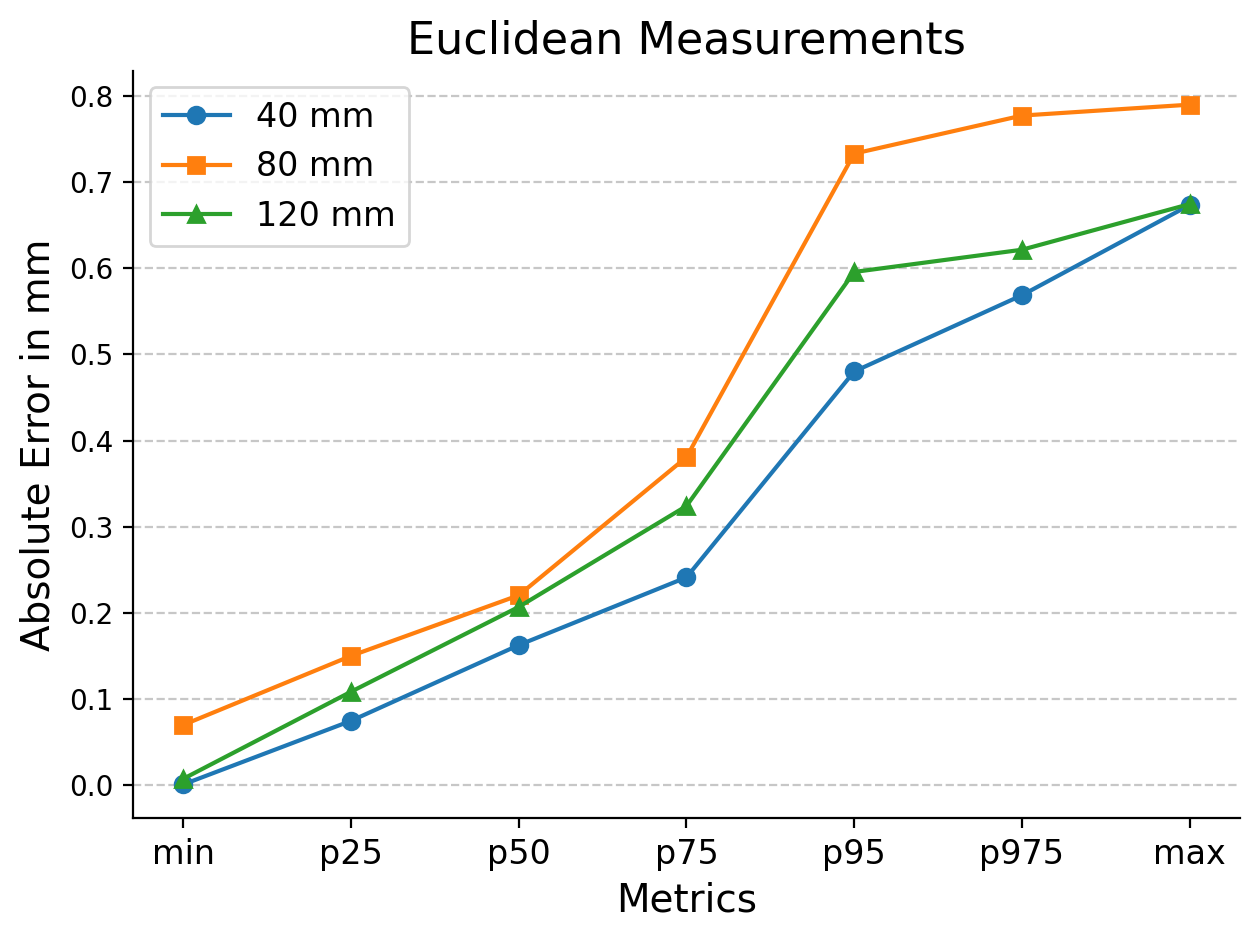

In [6]:
import matplotlib.pyplot as plt
import numpy as np

metrics = [metrics_dict['df_40_raft_results'], metrics_dict['df_80_raft_results'], metrics_dict['df_120_raft_results']]
labels = ['40 mm', '80 mm', '120 mm']

# Extract values of interest
keys = ['min', 'p25', 'p50', 'p75', 'p95', 'p975', 'max']
values = [[m[key] for key in keys] for m in metrics]

# Set up the plot
fig, ax = plt.subplots(dpi=200)

# Plot the data as line plots
x = np.arange(len(keys))
markers = ['o', 's', '^']
for i, val in enumerate(values):
    ax.plot(x, val, marker=markers[i], label=labels[i])

# Customize plot appearance
ax.set_xticks(x)
ax.set_xticklabels(keys, fontsize=12)
ax.set_xlabel('Metrics', fontsize=14)
ax.set_ylabel('Absolute Error in mm', fontsize=14)
ax.set_title('Euclidean Measurements', fontsize=16)
ax.legend(fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

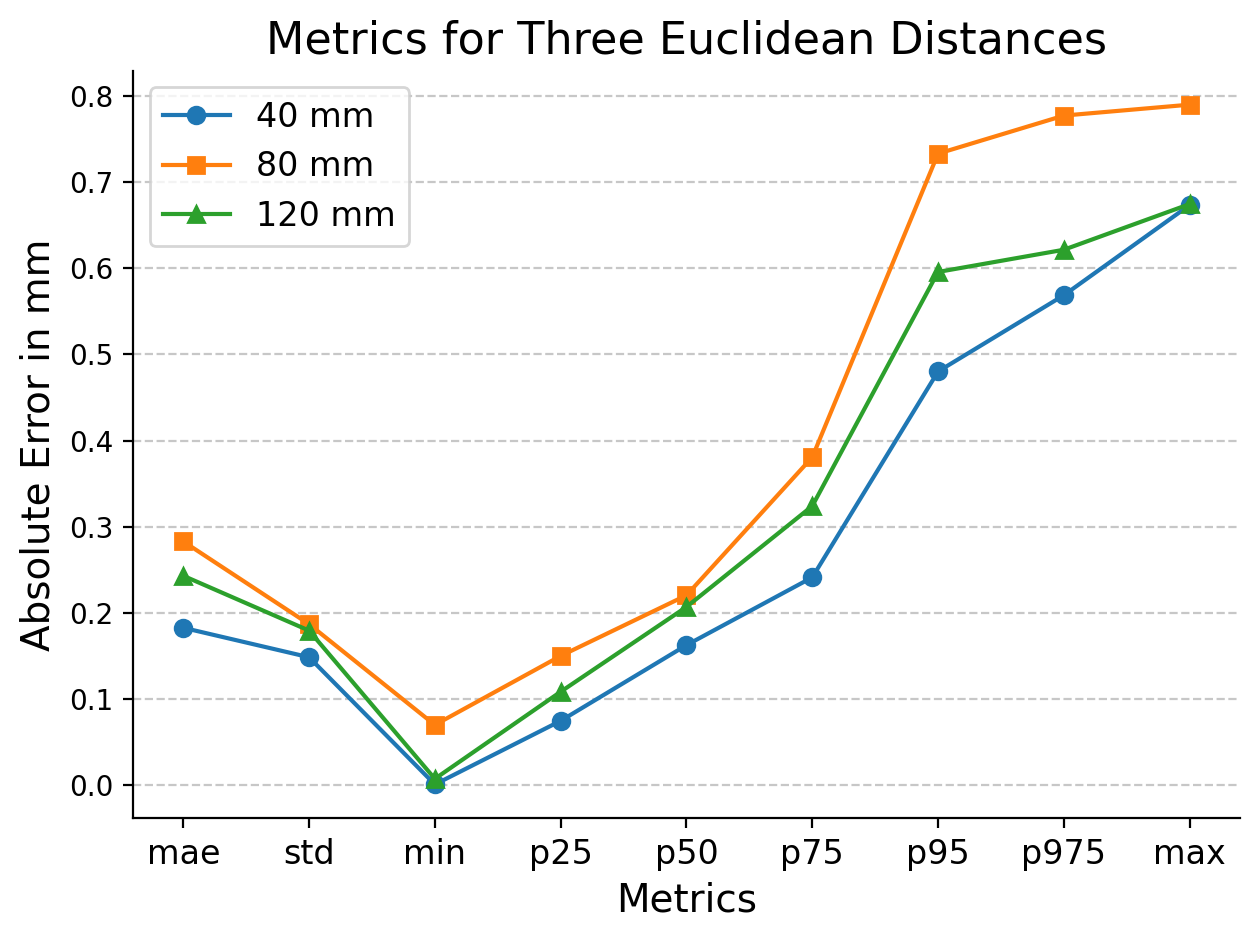

In [7]:
metrics = [metrics_dict['df_40_raft_results'], metrics_dict['df_80_raft_results'], metrics_dict['df_120_raft_results']]
labels = ['40 mm', '80 mm', '120 mm']

# Extract values of interest
keys = ['mae', 'std', 'min', 'p25', 'p50', 'p75', 'p95', 'p975', 'max']
values = [[m[key] for key in keys] for m in metrics]

# Set up the plot
fig, ax = plt.subplots(dpi=200)

# Plot the data as line plots
x = np.arange(len(keys))
markers = ['o', 's', '^']
for i, val in enumerate(values):
    ax.plot(x, val, marker=markers[i], label=labels[i])

# Customize plot appearance
ax.set_xticks(x)
ax.set_xticklabels(keys, fontsize=12)
ax.set_xlabel('Metrics', fontsize=14)
ax.set_ylabel('Absolute Error in mm', fontsize=14)
ax.set_title('Metrics for Three Euclidean Distances', fontsize=16)
ax.legend(fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

# 03. Shapiro-Wilk Test

40 mm - Shapiro-Wilk test statistic: 0.9613
40 mm - p-value: 0.1137
40 mm - The data follows a normal distribution.
80 mm - Shapiro-Wilk test statistic: 0.9788
80 mm - p-value: 0.5286
80 mm - The data follows a normal distribution.
120 mm - Shapiro-Wilk test statistic: 0.9799
120 mm - p-value: 0.5751
120 mm - The data follows a normal distribution.


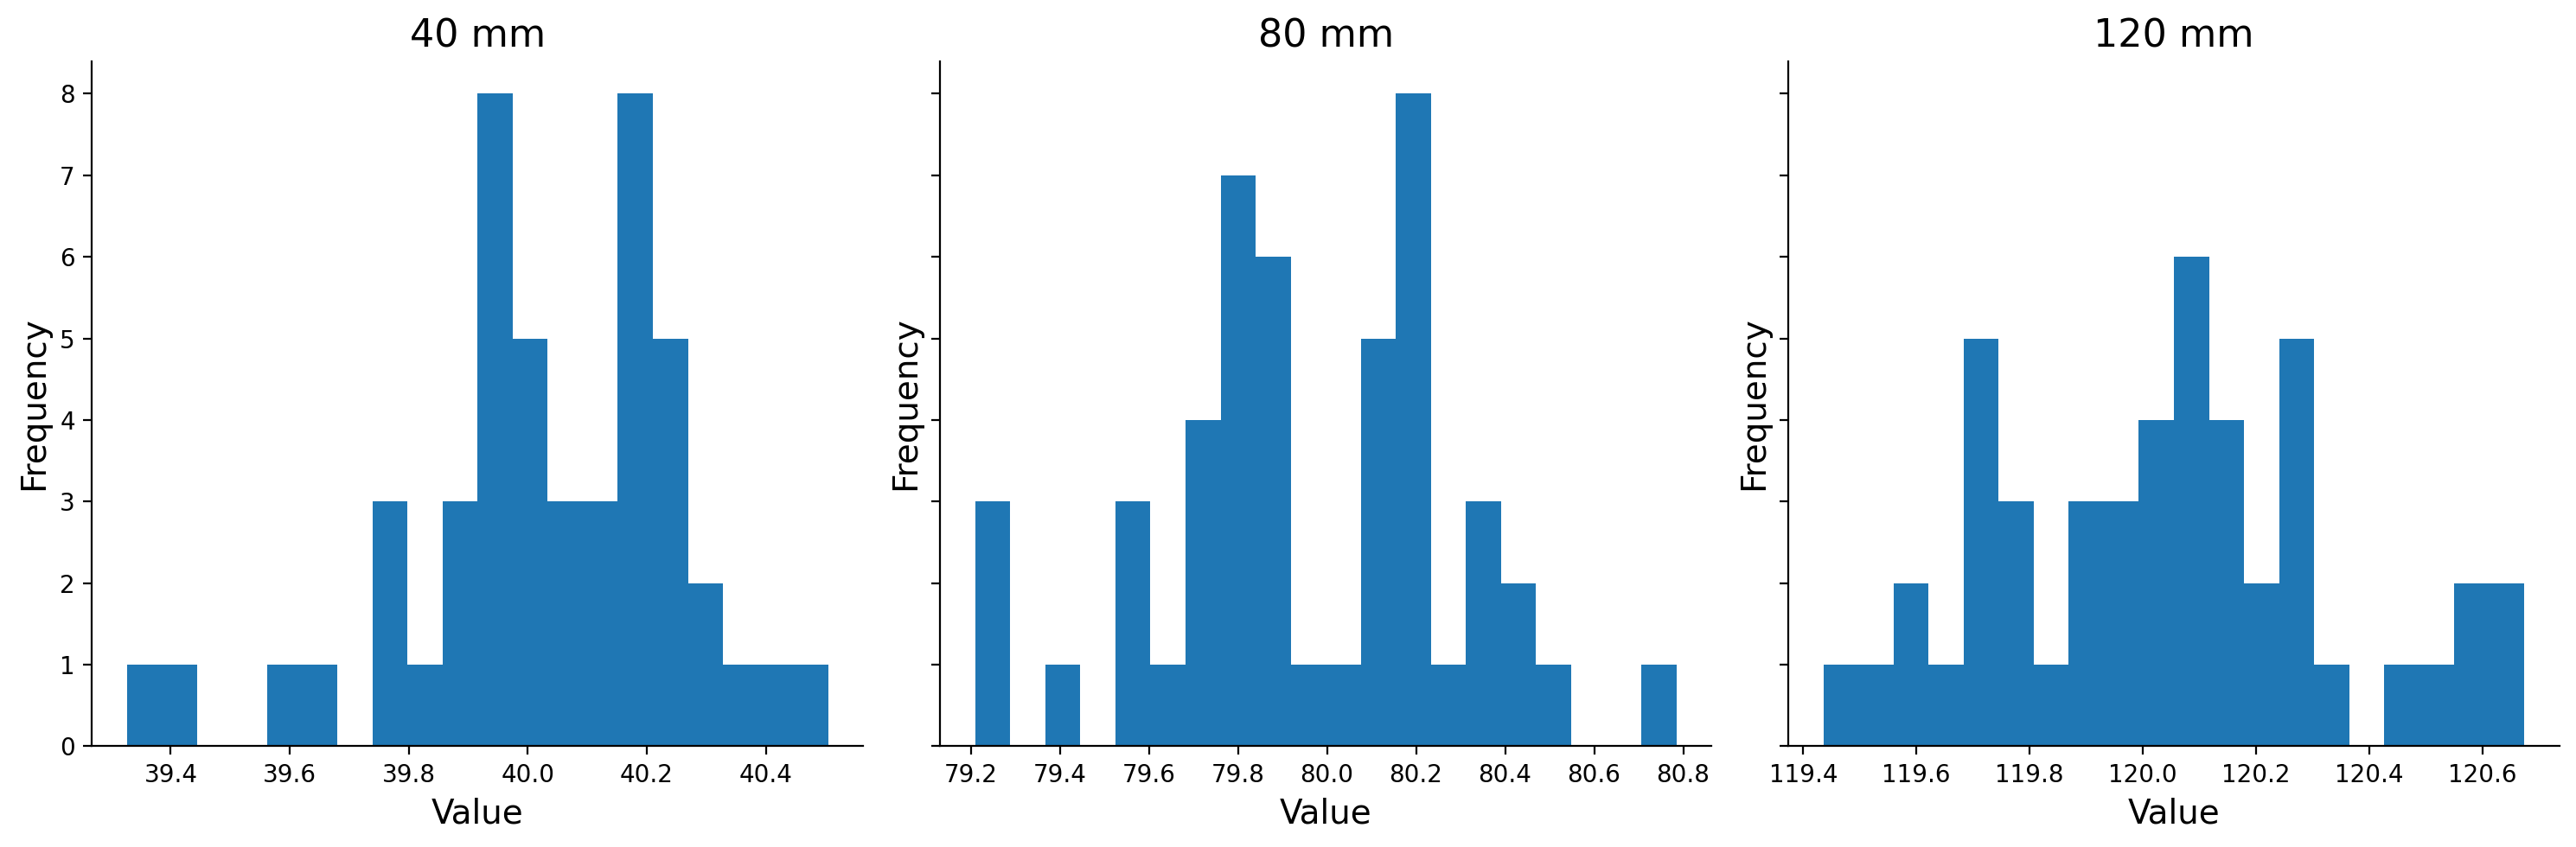

In [8]:
measurements_list = [dataframes['df_40_raft_results']['euclidian'].to_numpy(), dataframes['df_80_raft_results']['euclidian'].to_numpy(), dataframes['df_120_raft_results']['euclidian'].to_numpy()]
labels = ['40 mm', '80 mm', '120 mm']
# Set up the subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5), dpi=200, sharey=True)

for i, measurements in enumerate(measurements_list):
    # Test if the data follows a normal distribution using the Shapiro-Wilk test
    statistic, p_value = shapiro(measurements)

    print(f"{labels[i]} - Shapiro-Wilk test statistic: {statistic:.4f}")
    print(f"{labels[i]} - p-value: {p_value:.4f}")

    if p_value < 0.05:
        # H0 declined
        print(f"{labels[i]} - The data does not follow a normal distribution.")
    else:
        # H0 not declined
        print(f"{labels[i]} - The data follows a normal distribution.")

    # Plot the distribution of the data for visual approval
    axs[i].hist(measurements, bins=20)
    axs[i].set_xlabel("Value", fontsize=14)
    axs[i].set_ylabel("Frequency", fontsize=14)
    axs[i].set_title(f"{labels[i]}", fontsize=16)
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)

# Show the combined plot
plt.tight_layout()
plt.show()

# 04. Confidence Interval

Confidence interval for Measurement 1: (39.93453686550602, 40.11780738749147)
The measurement tool is accurate within the 0.2 mm threshold for Measurement 40 mm.
Confidence interval for Measurement 2: (79.82539845610997, 80.08885467940247)
The measurement tool is accurate within the 0.2 mm threshold for Measurement 80 mm.
Confidence interval for Measurement 3: (119.92453379002305, 120.15890244521887)
The measurement tool is accurate within the 0.2 mm threshold for Measurement 120 mm.


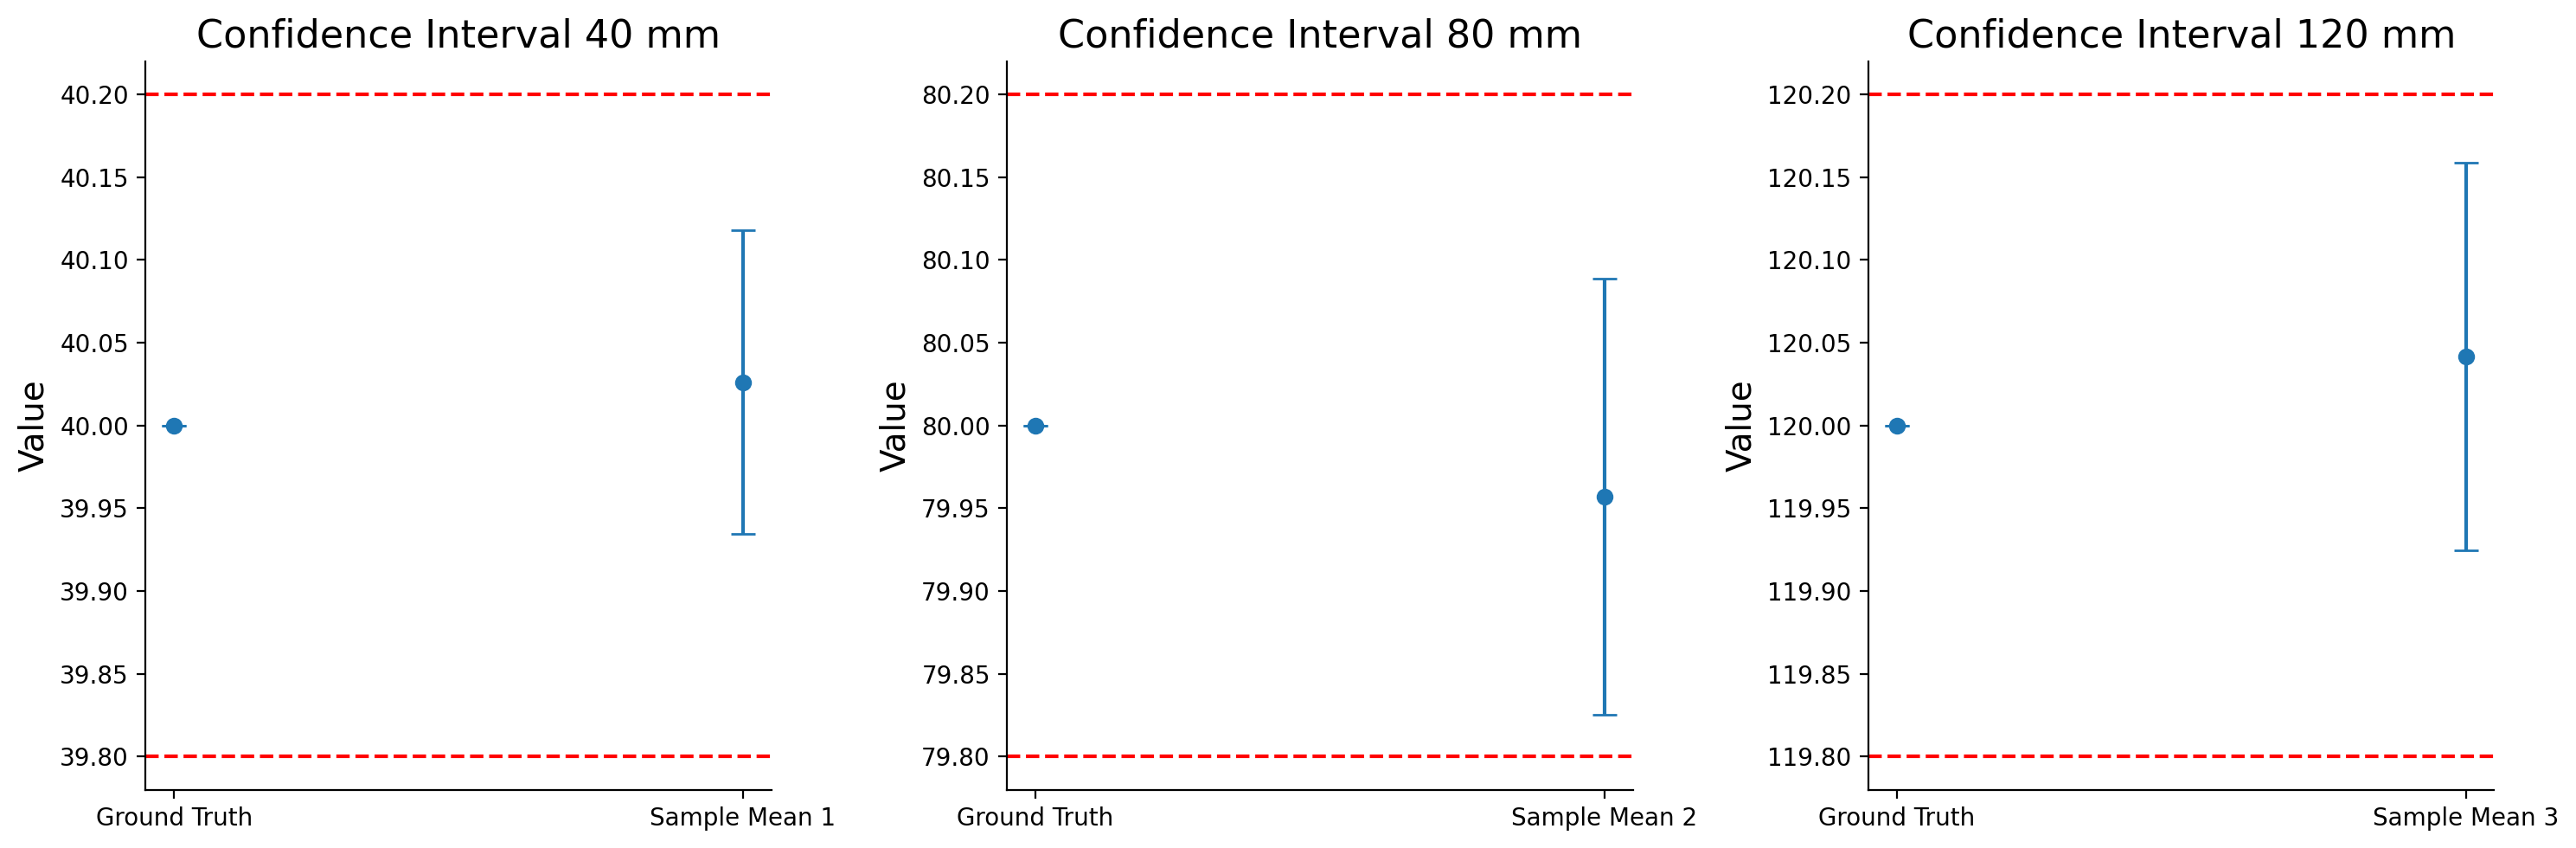

In [9]:
measurements_list = [dataframes['df_40_raft_results']['euclidian'].to_numpy(), dataframes['df_80_raft_results']['euclidian'].to_numpy(), dataframes['df_120_raft_results']['euclidian'].to_numpy()]
labels = ['40 mm', '80 mm', '120 mm']

# Update ground truth values for each measurement
ground_truths = [40, 80, 120]

threshold = 0.2
alpha = 0.01

# Set up the subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5), dpi=200)

for i, measurements in enumerate(measurements_list):
    ground_truth = ground_truths[i]
    
    sample_mean = np.mean(measurements)
    sem = stats.sem(measurements)
    t_critical = stats.t.ppf(1 - alpha/2, len(measurements) - 1)
    lower_ci = sample_mean - t_critical * sem
    upper_ci = sample_mean + t_critical * sem

    print(f"Confidence interval for Measurement {i+1}: ({lower_ci}, {upper_ci})")

    if (ground_truth - threshold) <= lower_ci and (ground_truth + threshold) >= upper_ci:
        print(f"The measurement tool is accurate within the {threshold} mm threshold for Measurement {labels[i]}.")
    else:
        print(f"The measurement tool is not accurate within the {threshold} mm threshold for Measurement {labels[i]}.")

    x = np.array(['Ground Truth', f'Sample Mean {i+1}'])
    y = np.array([ground_truth, sample_mean])
    yerr = np.array([0, t_critical * sem])

    axs[i].errorbar(x, y, yerr=yerr, fmt='o', capsize=5)
    axs[i].axhline(y=ground_truth - threshold, color='r', linestyle='--')
    axs[i].axhline(y=ground_truth + threshold, color='r', linestyle='--')
    #axs[i].set_xlabel('Measurement', fontsize=14)
    axs[i].set_ylabel('Value', fontsize=14)
    axs[i].set_title(f'Confidence Interval {labels[i]}', fontsize=16)
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)

# Show the combined plot
plt.tight_layout()
plt.show()

# 05. Playground Examples

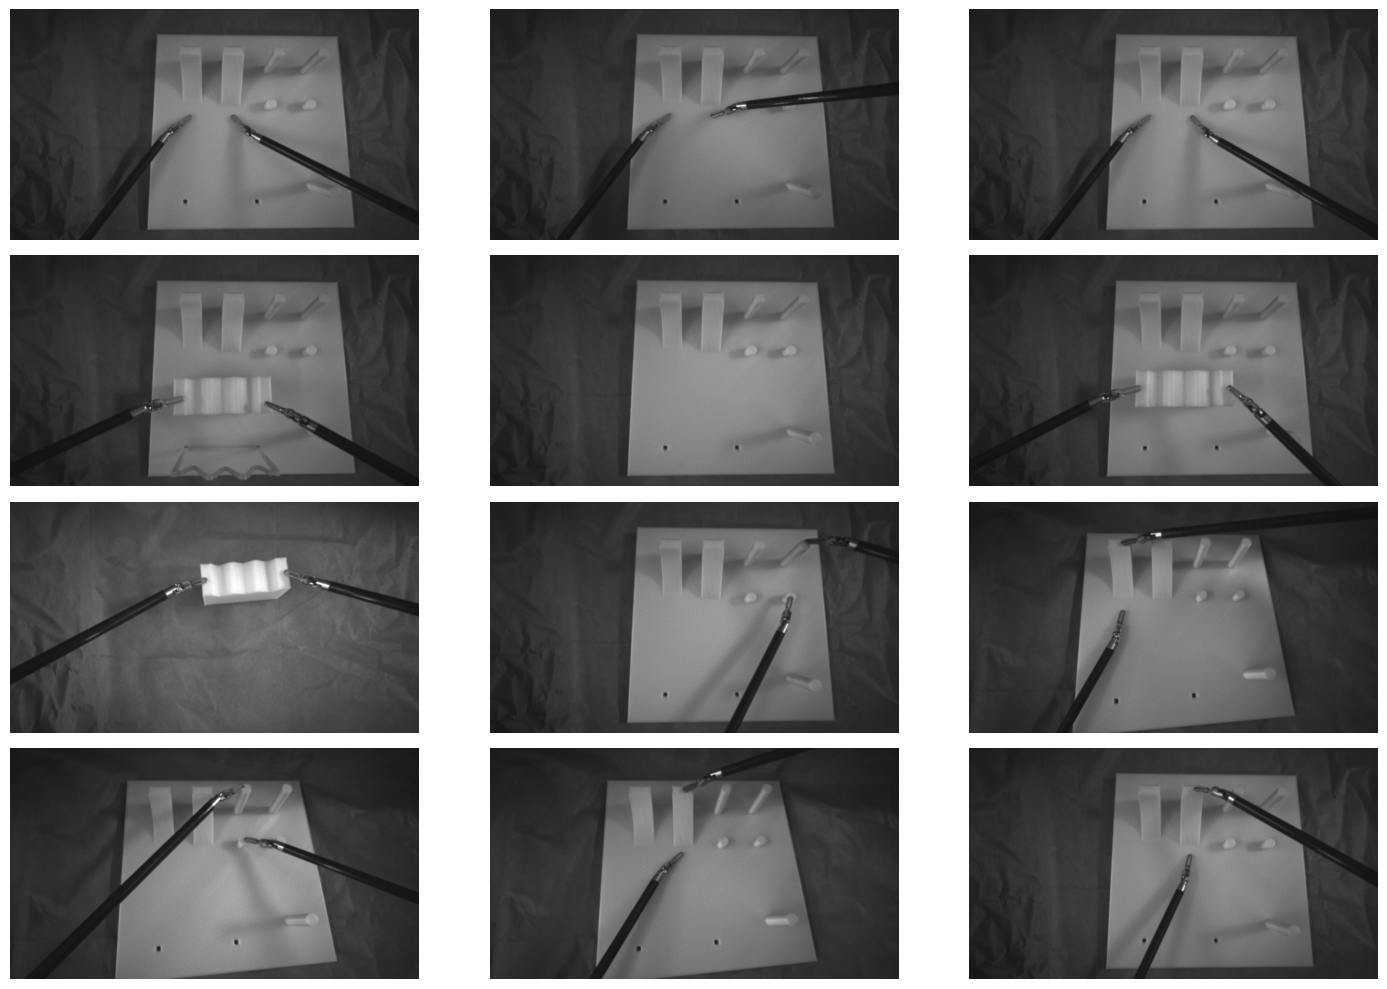

In [13]:
# Set the path to your images directory
ROOT = ''

image_directory = os.path.join(ROOT, 'evaluations/playground_samples')

# Read the first 12 image filenames
image_filenames = [f for f in os.listdir(image_directory) if f.endswith(('.jpg', '.jpeg', '.png'))][:12]

# Load the images
images = [cv2.imread(os.path.join(image_directory, img)) for img in image_filenames]

# Convert images from BGR to RGB (required for displaying with matplotlib)
images_rgb = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in images]

# Display the images in a 3x4 matrix plot
fig, axes = plt.subplots(4, 3, figsize=(15, 10))

for i, ax in enumerate(axes.flat):
    if i < len(images_rgb):
        ax.imshow(images_rgb[i])
        #ax.set_title(image_filenames[i])
    ax.axis('off')

plt.tight_layout()

plt.show()

# 06. Boxplots

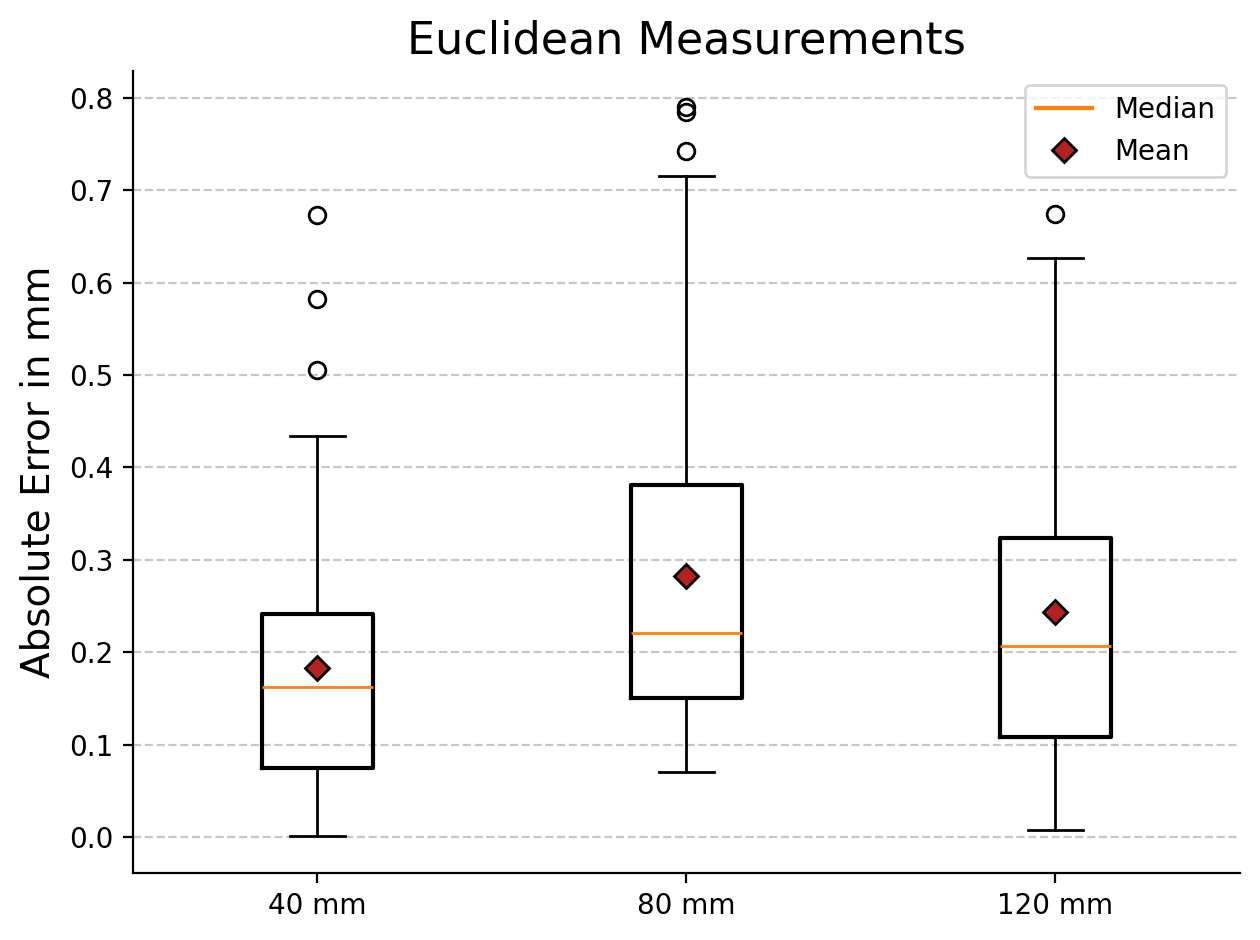

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Replace these with your actual numpy arrays for the mean absolute errors (maes)
mae_40 = dataframes['df_40_raft_results']['euclidian_diff'].to_numpy()
mae_80 = dataframes['df_80_raft_results']['euclidian_diff'].to_numpy()
mae_120 = dataframes['df_120_raft_results']['euclidian_diff'].to_numpy()

maes = [mae_40, mae_80, mae_120]
labels = ['40 mm', '80 mm', '120 mm']

# Set up the plot
fig, ax = plt.subplots(dpi=200)

# Boxplot properties
boxprops = dict(linestyle='-', linewidth=1.5)
meanprops = dict(marker='D', markeredgecolor='black', markerfacecolor='firebrick', markersize=6)

# Create the boxplot
ax.boxplot(maes, labels=labels, boxprops=boxprops, meanprops=meanprops, showmeans=True, meanline=False)

ax.set_ylabel('Absolute Error in mm', fontsize=14)
ax.set_title('Euclidean Measurements', fontsize=16)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create custom legend elements
legend_elements = [
    Line2D([0], [0], color='C1', lw=1.5, label='Median'),
    Line2D([0], [0], marker='D', color='w', markeredgecolor='k', markerfacecolor='firebrick', markersize=6, label='Mean')
]

# Add the legend
ax.legend(handles=legend_elements, loc='upper right', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()